In [6]:
import pandas as pd
import numpy as np
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pathlib
import dask.dataframe as dd
from dask.multiprocessing import get
import numpy as np
import librosa
from scipy import signal
from scipy.io import wavfile
from scipy.signal import butter,filtfilt
from scipy.stats import kurtosis
import scipy.signal as signal
from scipy.integrate import simps
import IPython.display as ipd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
filename= '/home/abrol/ARYAN_MT22019/CoughVid/public_dataset/fffce9f0-a5e8-4bee-b13b-c671aac4a61c.webm'

/tmp/ipykernel_653541/1291756345.py:2: UserWarning: PySoundFile failed. Trying audioread instead.
  data,sample_rate=librosa.load(filename)
/home/abrol/miniconda3/envs/Cough/lib/python3.11/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


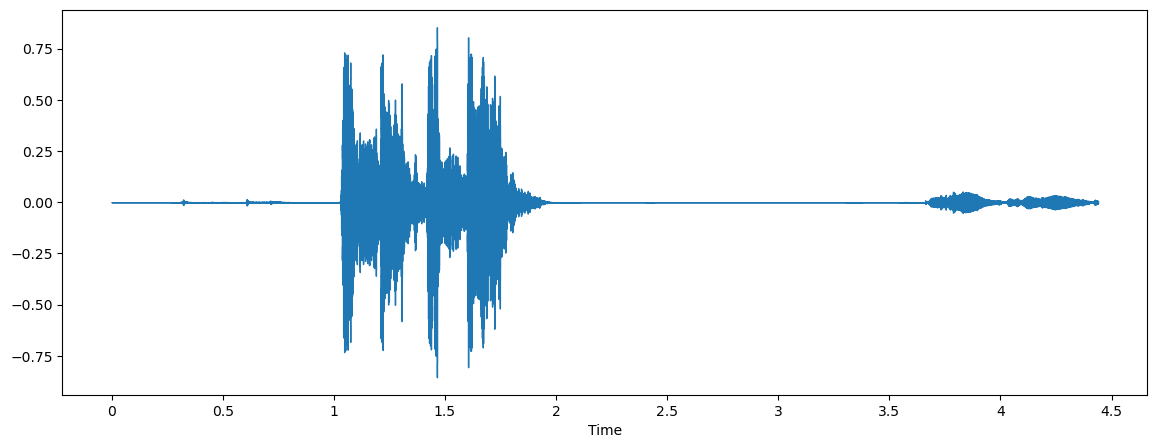

In [28]:
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

In [29]:
sample_rate

22050

In [30]:
data

array([ 0.        ,  0.        ,  0.        , ..., -0.00231448,
       -0.00201326, -0.0017971 ], dtype=float32)

**Extract Features**

Here we will be using Mel-Frequency Cepstral Coefficients (MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [31]:
mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 192)


In [32]:
mfccs

array([[-5.5456628e+02, -5.5456628e+02, -5.5456628e+02, ...,
        -4.6219083e+02, -4.6456665e+02, -4.7055582e+02],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -1.6270337e+00,  3.5946609e+01,  6.2664303e+01],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         2.4172398e+01,  4.1784805e+01,  4.5514214e+01],
       ...,
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         5.9885979e+00, -1.6213344e+00, -3.4744687e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         2.1818423e+00, -3.6466680e+00,  2.8549862e-01],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         1.0128927e+01,  4.2870264e+00,  2.2924073e+00]], dtype=float32)

In [33]:
data, sample_rate = librosa.effects.trim(data)
data,sample_rate

(array([-2.1837570e-09,  2.6606077e-09, -3.2148240e-09, ...,
        -2.3144754e-03, -2.0132598e-03, -1.7970959e-03], dtype=float32),
 array([ 6144, 97902]))

In [26]:
data.shape

(91758,)

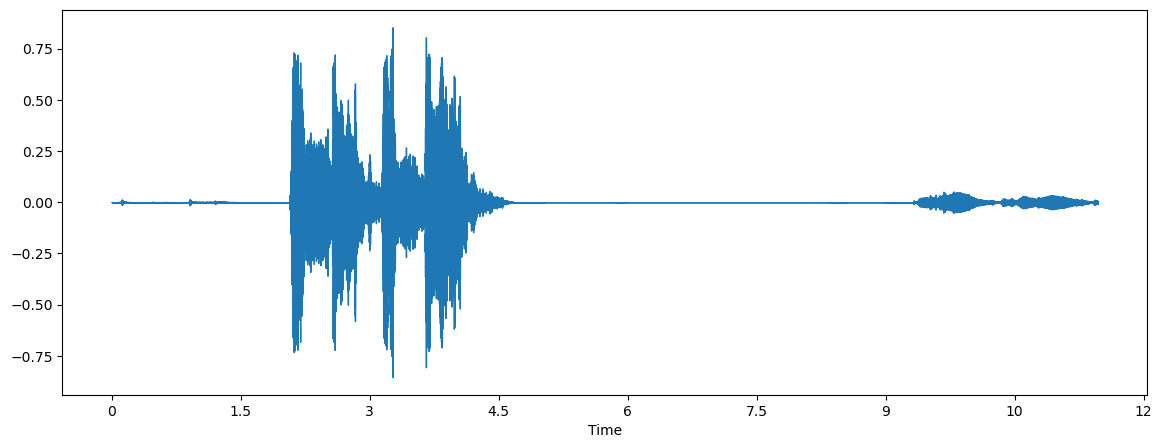

In [36]:
plt.figure(figsize=(14,5))
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

In [37]:
files_dir = "/home/abrol/ARYAN_MT22019/CoughVid/public_dataset/"
data_vec = []
Sampling_rate_vec = []  # sample rate

i = 0
for audio_file in os.listdir(files_dir):
    if audio_file.endswith('.webm'):
      i = i+1
      audio_path = os.path.join(files_dir, audio_file)
      y, sr = librosa.load(audio_path)
      data_vec.append(y)
      Sampling_rate_vec.append(sr)
      if i == 10:
        break

n = len(data_vec)  # data size
print(n)

/tmp/ipykernel_653541/2976917309.py:10: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path)
/home/abrol/miniconda3/envs/Cough/lib/python3.11/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipykernel_653541/2976917309.py:10: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path)
/home/abrol/miniconda3/envs/Cough/lib/python3.11/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipykernel_653541/2976917309.py:10: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path)
/home/abrol/mi

10


/tmp/ipykernel_653541/2976917309.py:10: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path)
/home/abrol/miniconda3/envs/Cough/lib/python3.11/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipykernel_653541/2976917309.py:10: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path)
/home/abrol/miniconda3/envs/Cough/lib/python3.11/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipykernel_653541/2976917309.py:10: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path)
/home/abrol/mi

In [38]:
durations = []
for i in range(0, len(data_vec)):
  temp = librosa.get_duration(y = data_vec[i], sr = Sampling_rate_vec[i])
  durations.append(temp)

sum(durations)/len(durations)

8.129999999999999

In [39]:
import random

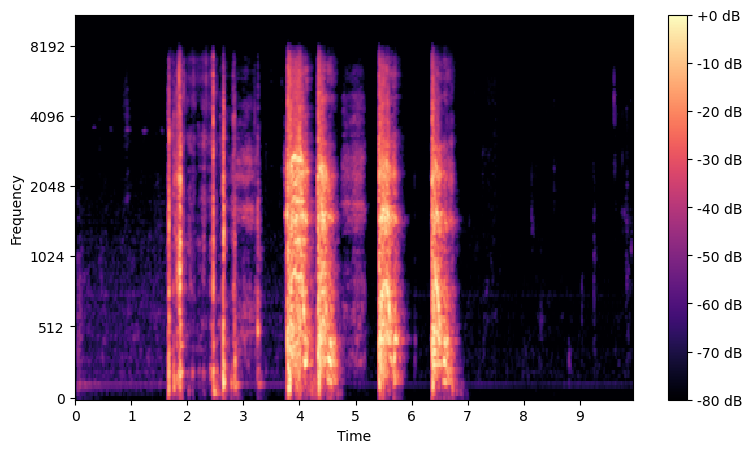

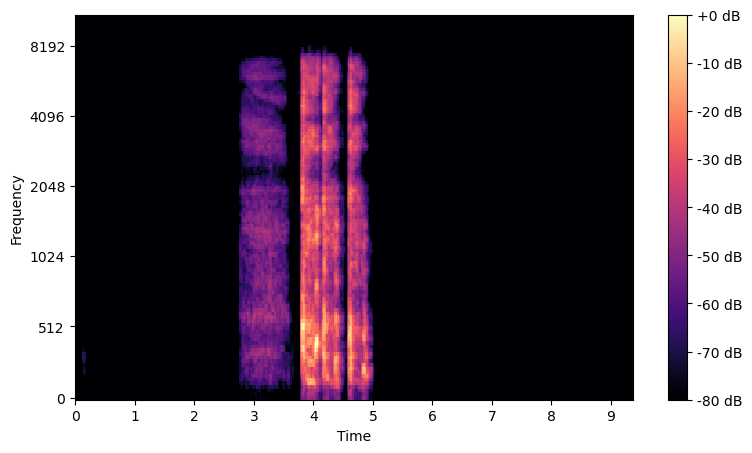

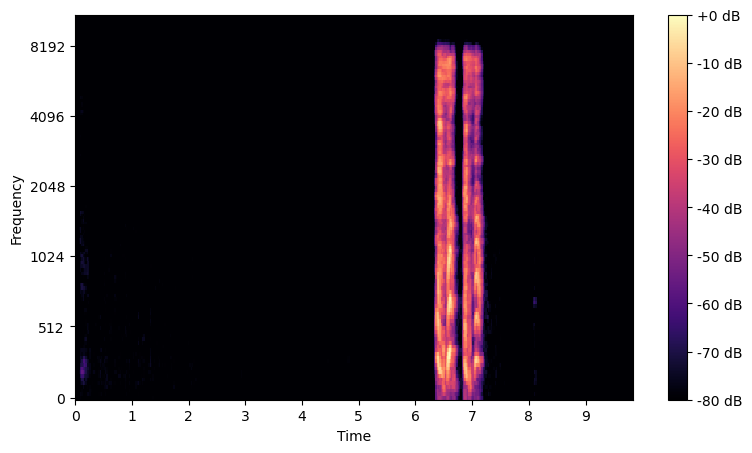

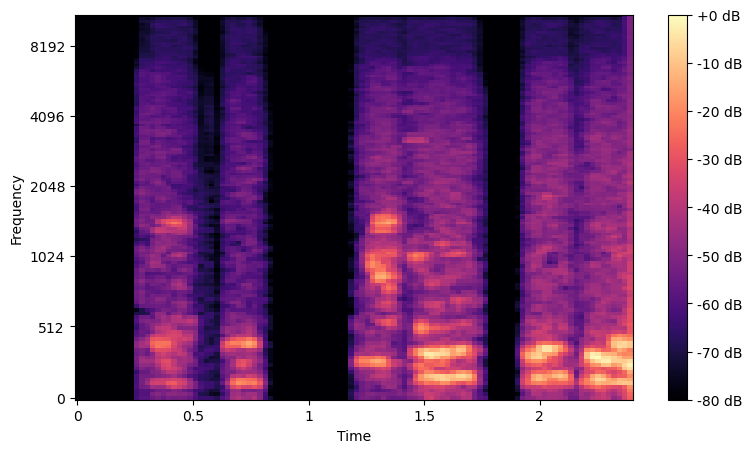

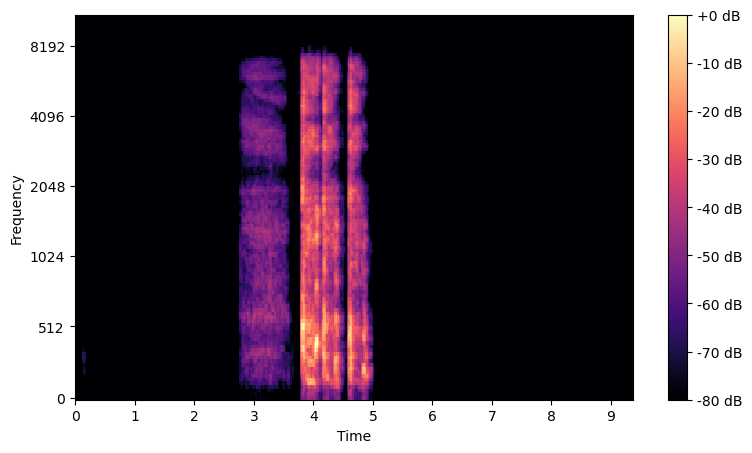

In [40]:
sample_indices = []
for i in range(5):
  a = random.randint(0, n)
  sample_indices.append(a)

for i in sample_indices:
    spectrogram = librosa.feature.melspectrogram(y = data_vec[i], sr = Sampling_rate_vec[i])
    # Converting spectrogram into decibels
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

    # Plot
    plt.figure(figsize=(9, 5))
    librosa.display.specshow(spectrogram_db, sr=Sampling_rate_vec[i], x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.show()

ValueError: ignored

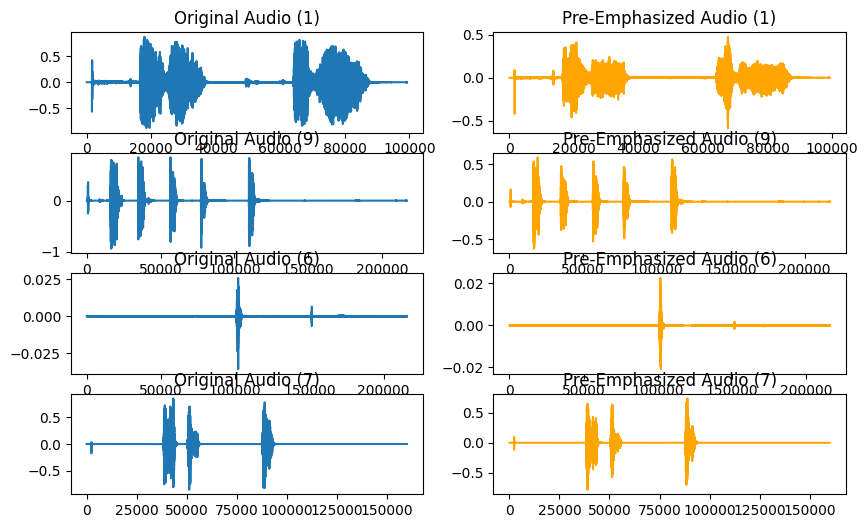

In [ ]:
sample_indices = []
for i in range(5):
  a = random.randint(0, n)
  sample_indices.append(a)


# Pre-Emphasis Coefficient
alpha = 0.96
j = 0
plt.figure(figsize=(10,6))
for i in sample_indices:
    y, sr = data_vec[i], Sampling_rate_vec[i]
    # Pre-Emphasis Filter (y[n] = x[n] - alpha * x[n-1])
    y_pre_emphasis = np.append(y[0], y[1:] - alpha * y[:-1])

    # Plot the original and pre-emphasized waveforms
    plt.subplot(4, 2, j*2 + 1)
    plt.plot(y)
    plt.title(f"Original Audio ({i})")

    plt.subplot(4, 2, j*2 + 2)
    plt.plot(y_pre_emphasis, color='orange')
    plt.title(f"Pre-Emphasized Audio ({i})")

    j = j+1

plt.tight_layout()
plt.show()

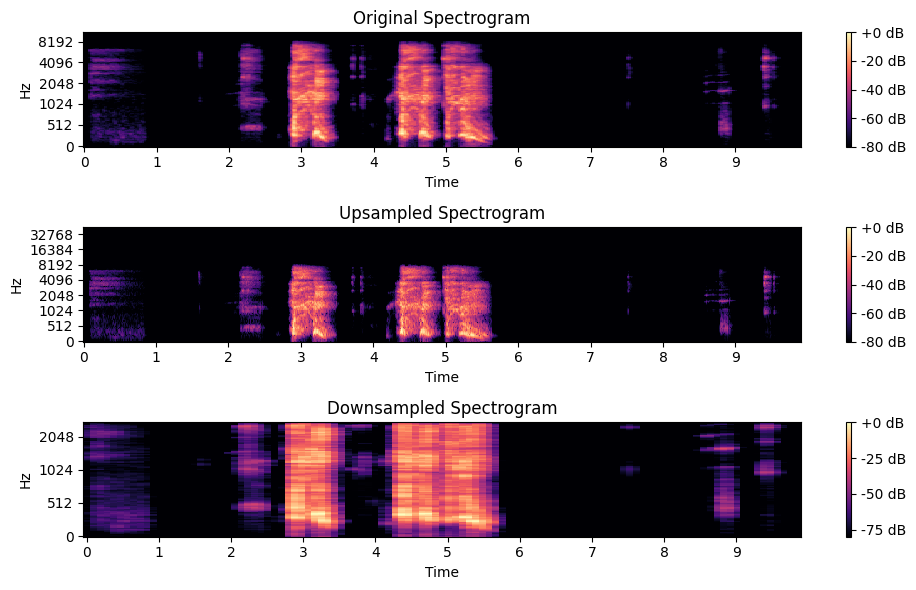

In [ ]:
i = random.randint(0, n)

y, sr = data_vec[i], Sampling_rate_vec[i]
# Upsampling
upsampling_factor = 4
y_upsampled = librosa.resample(y, orig_sr=sr, target_sr=sr * upsampling_factor)

# Downsampling
downsampling_factor = 4
y_downsampled = librosa.resample(y, orig_sr=sr, target_sr=sr // downsampling_factor)

spectrogram_original = librosa.feature.melspectrogram(y=y,sr=sr)
spectrogram_upsampled = librosa.feature.melspectrogram(y=y_upsampled,sr=sr * upsampling_factor)
spectrogram_downsampled = librosa.feature.melspectrogram(y=y_downsampled,sr=sr // downsampling_factor)

plt.figure(figsize=(10, 6))

# Plot original
plt.subplot(3, 1, 1)
librosa.display.specshow(librosa.power_to_db(spectrogram_original, ref=np.max), sr=sr, x_axis='time', y_axis='mel')
plt.title('Original Spectrogram')
plt.colorbar(format='%+2.0f dB')

# Plot upsampled
plt.subplot(3, 1, 2)
librosa.display.specshow(librosa.power_to_db(spectrogram_upsampled, ref=np.max), sr=sr * upsampling_factor, x_axis='time', y_axis='mel')
plt.title('Upsampled Spectrogram')
plt.colorbar(format='%+2.0f dB')

# Plot downsampled
plt.subplot(3, 1, 3)
librosa.display.specshow(librosa.power_to_db(spectrogram_downsampled, ref=np.max), sr=sr // downsampling_factor, x_axis='time', y_axis='mel')
plt.title('Downsampled Spectrogram')
plt.colorbar(format='%+2.0f dB')

plt.tight_layout()
plt.show()


Upsampling tries to increase the granularity of the signal by increasing the sampling rate. Downsampling does the opposite and can be used to reduce the computational complexity. Downsampling leads to loss of granularity which can be noticed in the above plot as the spectrogram becomes smoother. Upsampling & Downsampling also leads to change in frequency resolution.

**Spectral Centroids**

The spectral centroid indicates at which frequency the energy of a spectrum is centered upon or in other words It indicates where the ” center of mass” for a sound is located.

In [41]:
import sklearn

In [42]:
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
      return sklearn.preprocessing.minmax_scale(x, axis=axis)

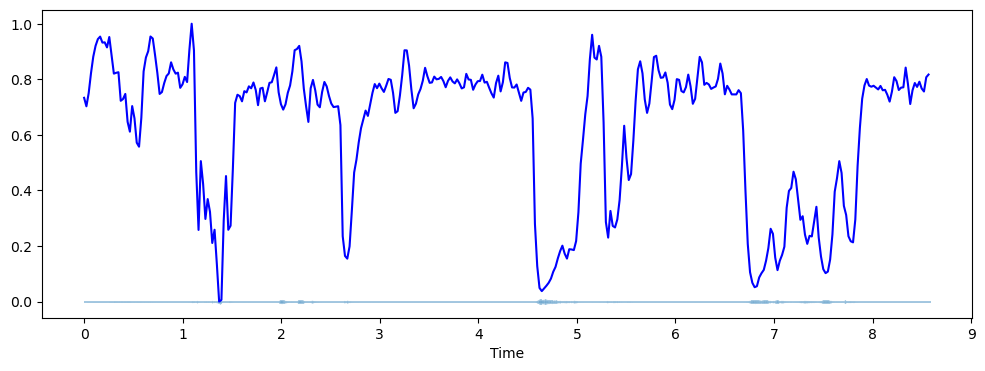

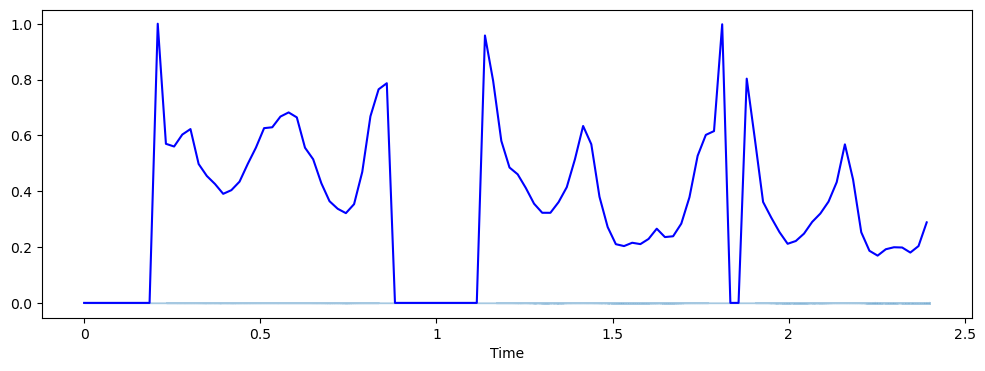

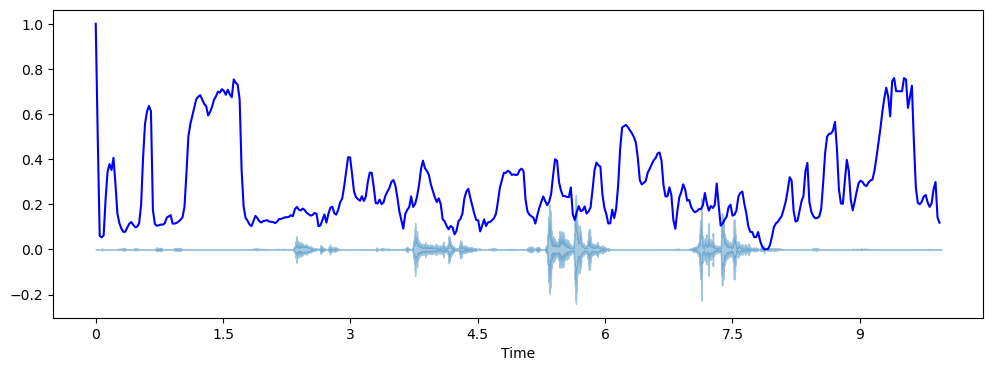

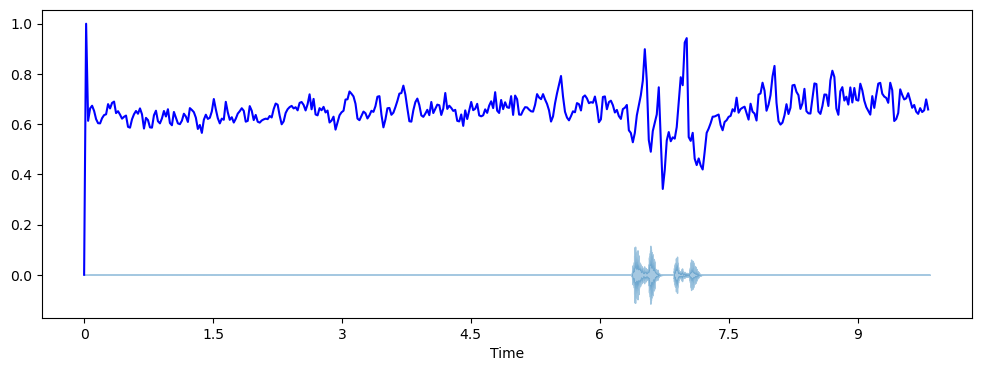

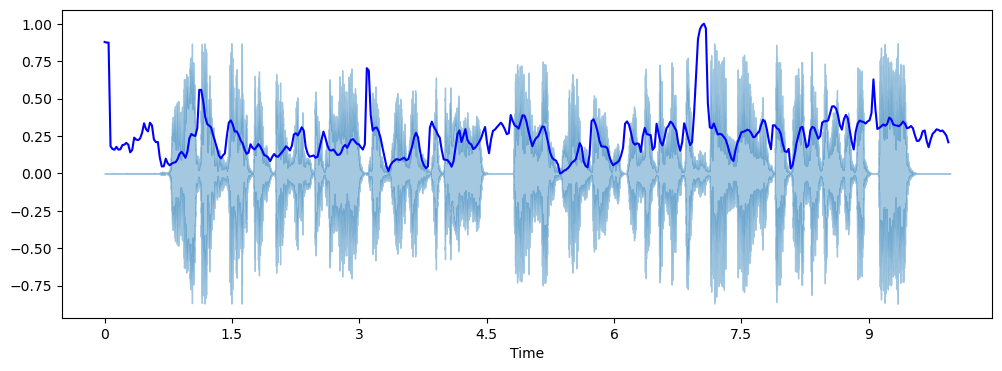

In [43]:
for i in range(5):

  spectral_centroids = librosa.feature.spectral_centroid(y=data_vec[i], sr=Sampling_rate_vec[i])[0]
  spectral_centroids.shape
  (775,)
  # Computing the time variable for visualization
  plt.figure(figsize=(12, 4))
  frames = range(len(spectral_centroids))
  t = librosa.frames_to_time(frames)

  #Plotting the Spectral Centroid along the waveform
  librosa.display.waveshow(y=data_vec[i], sr=Sampling_rate_vec[i], alpha=0.4)
  plt.plot(t, normalize(spectral_centroids), color='b')

**Spectral Bandwidth**

The spectral bandwidth is defined as the width of the band of light at one-half the peak maximum (or full width at half maximum [FWHM]) and is represented by the two vertical red lines and λSB on the wavelength axis.

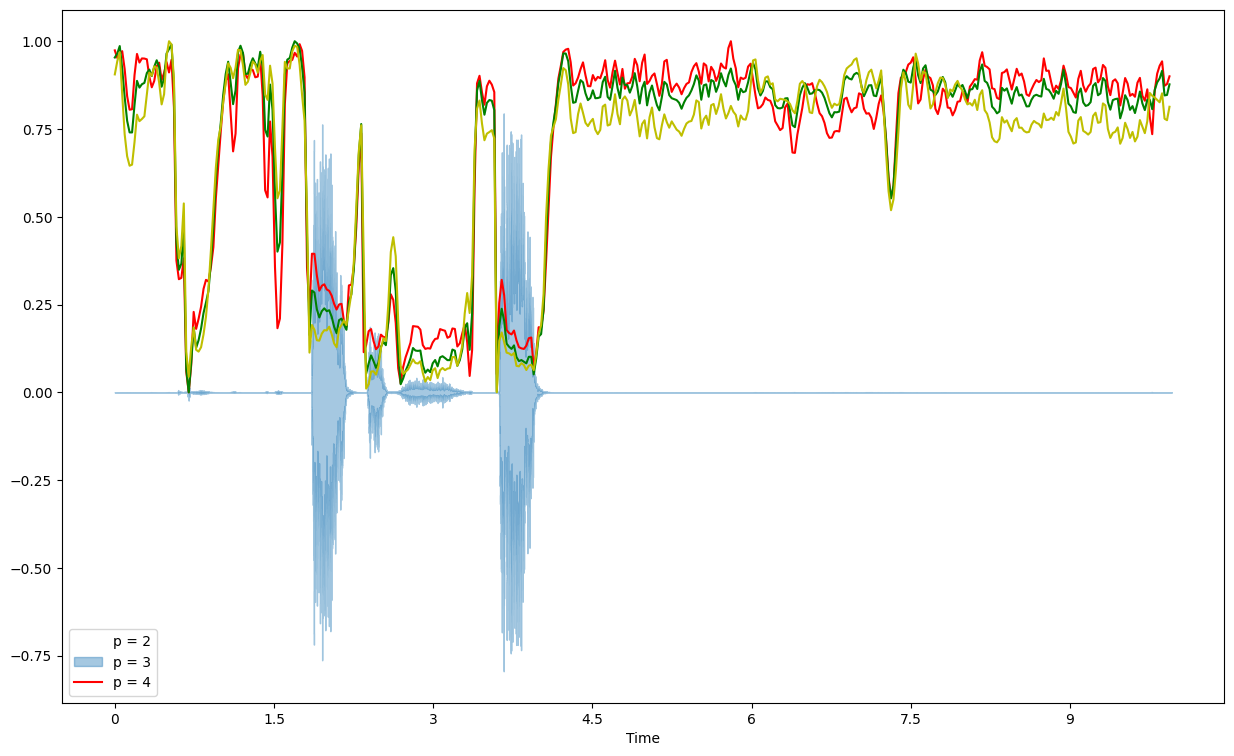

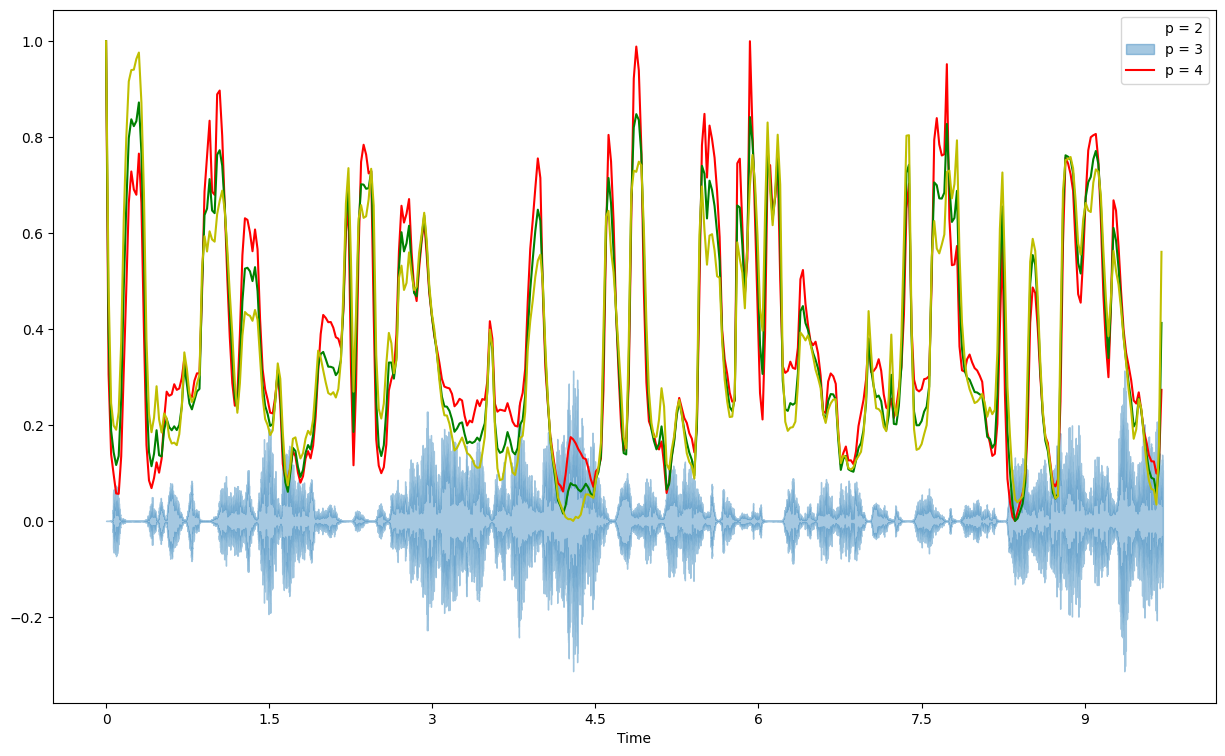

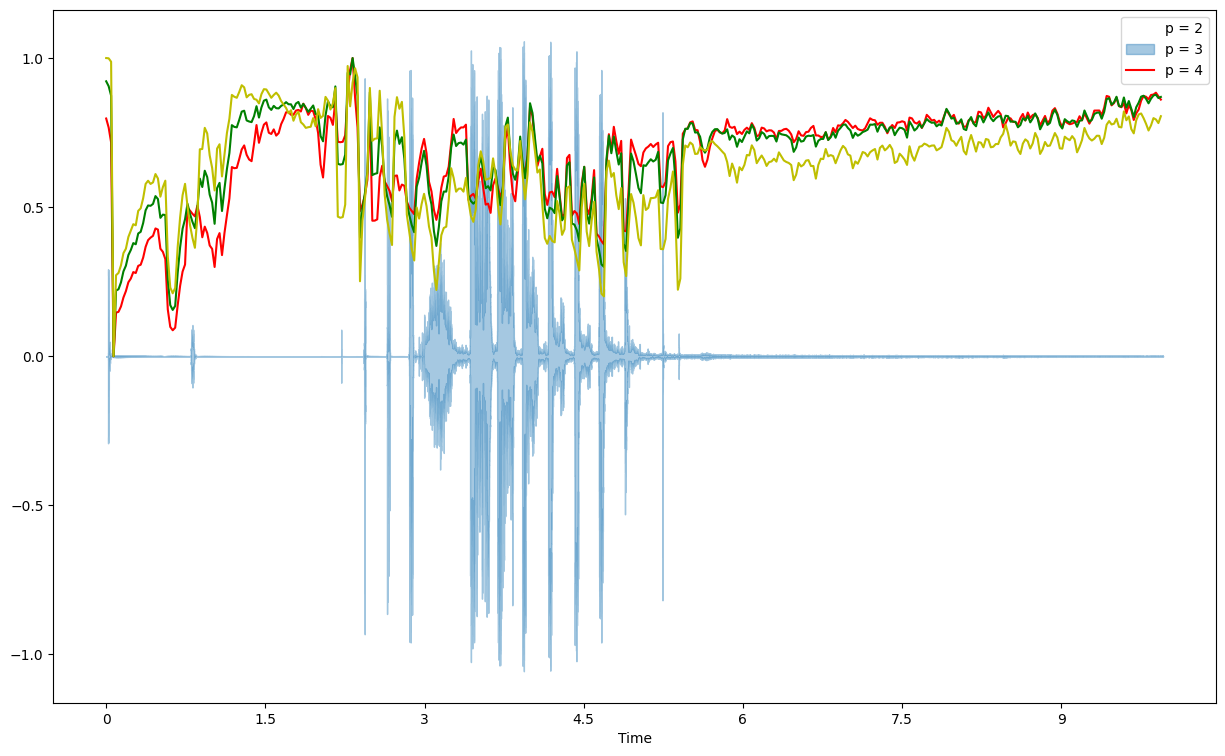

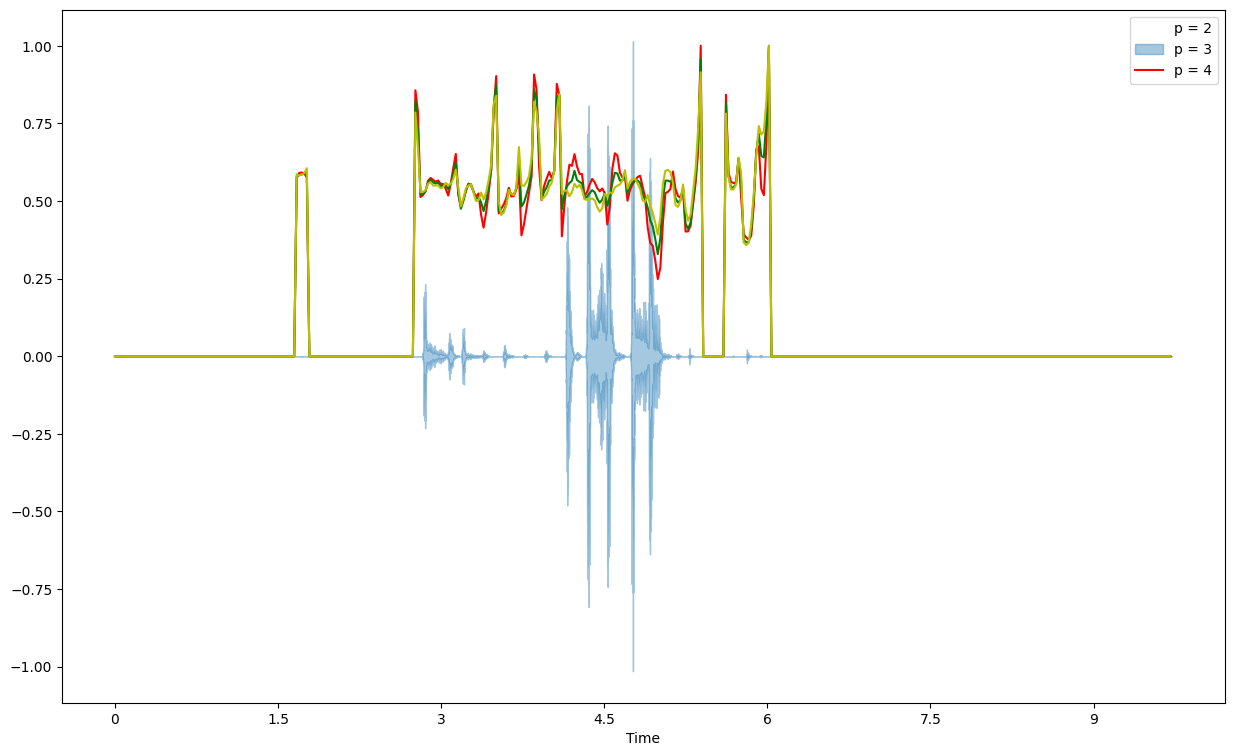

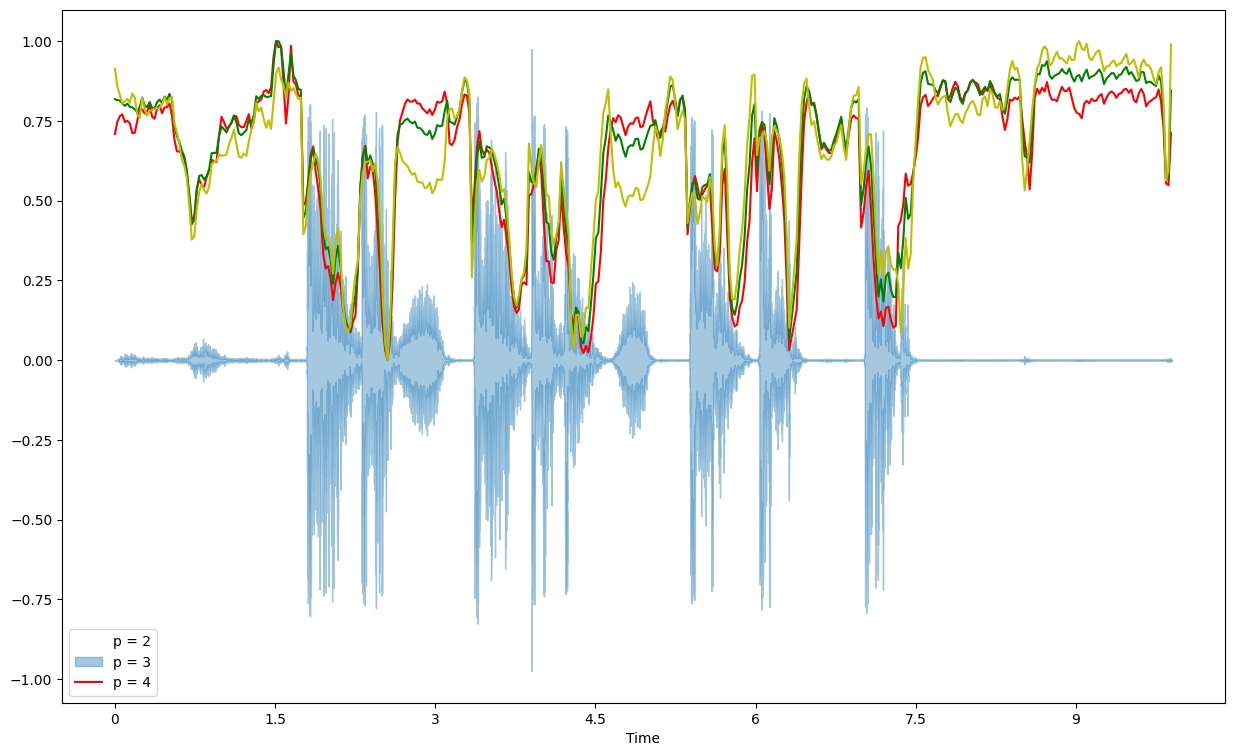

In [ ]:
for i in range(5):
  spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y=data_vec[i], sr=Sampling_rate_vec[i])[0]
  spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y=data_vec[i], sr=Sampling_rate_vec[i], p=3)[0]
  spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y=data_vec[i], sr=Sampling_rate_vec[i], p=4)[0]
  plt.figure(figsize=(15, 9))
  librosa.display.waveshow(y=data_vec[i], sr=Sampling_rate_vec[i], alpha=0.4)

  frames = range(len(spectral_bandwidth_2))
  t = librosa.frames_to_time(frames)
  plt.plot(t, normalize(spectral_bandwidth_2), color='r')

  frames = range(len(spectral_bandwidth_3))
  t = librosa.frames_to_time(frames)
  plt.plot(t, normalize(spectral_bandwidth_3), color='g')

  frames = range(len(spectral_bandwidth_4))
  t = librosa.frames_to_time(frames)
  plt.plot(t, normalize(spectral_bandwidth_4), color='y')
  plt.legend(('p = 2', 'p = 3', 'p = 4'))

In [44]:
df = pd.read_csv('/home/abrol/ARYAN_MT22019/CoughVid/public_dataset/metadata_compiled.csv')

In [ ]:
files_dir= '/home/abrol/ARYAN_MT22019/CoughVid/public_dataset/'

In [45]:
zcr_df = pd.DataFrame(columns=['Zcr', 'status'])

In [ ]:
data_vec = []
Sampling_rate_vec = []  # sample rate
Z_scr =[]
for audio_file in os.listdir(files_dir):
    if audio_file.endswith('.webm'):
      audio_path = os.path.join(files_dir, audio_file)
      y, sr = librosa.load(audio_path)
      data_vec.append(y)
      Sampling_rate_vec.append(sr)
      zero_crossings = librosa.zero_crossings(y, pad=False)



**Zero-Crossing Rate**

A very simple way for measuring the smoothness of a signal is to calculate the number of zero-crossing within a segment of that signal. A voice signal oscillates slowly — for example, a 100 Hz signal will cross zero 100 per second — whereas an unvoiced fricative can have 3000 zero crossings per second.

In [ ]:
for i in range(5):
  zero_crossings = librosa.zero_crossings(data_vec[i], pad=False)
  print(sum(zero_crossings))

42635
19227
40219
11726
27190


**Chroma feature**

A chroma feature or vector is typically a 12-element feature vector indicating how much energy of each pitch class, {C, C#, D, D#, E, …, B}, is present in the signal. In short, It provides a robust way to describe a similarity measure between music pieces.

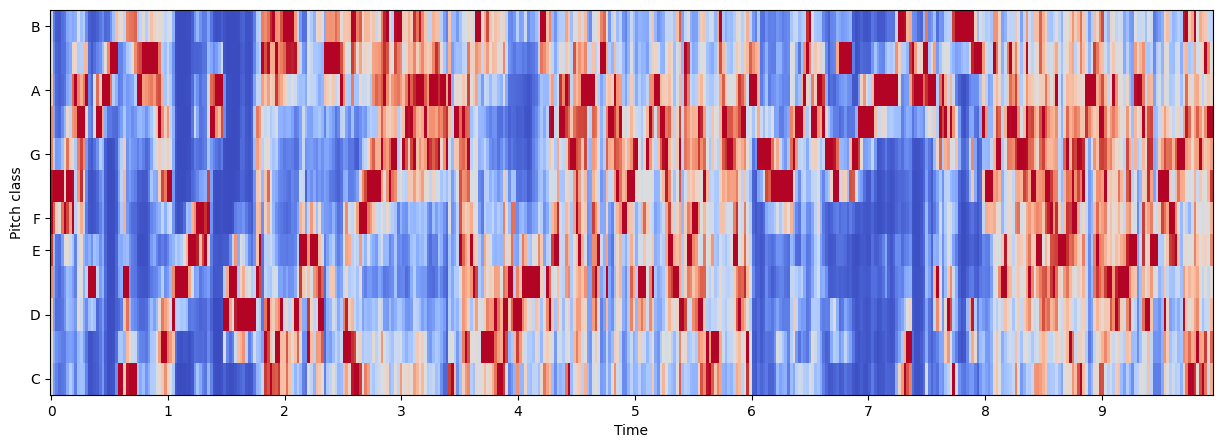

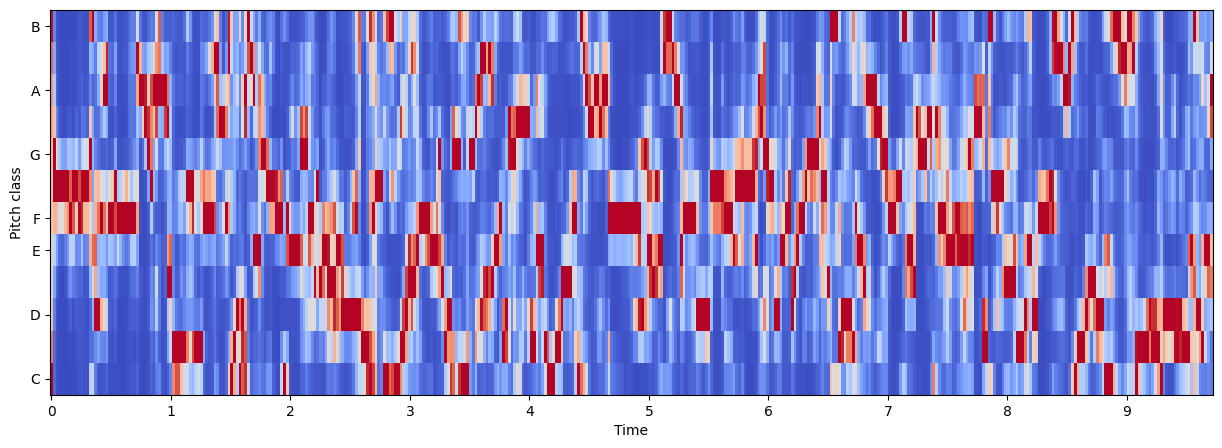

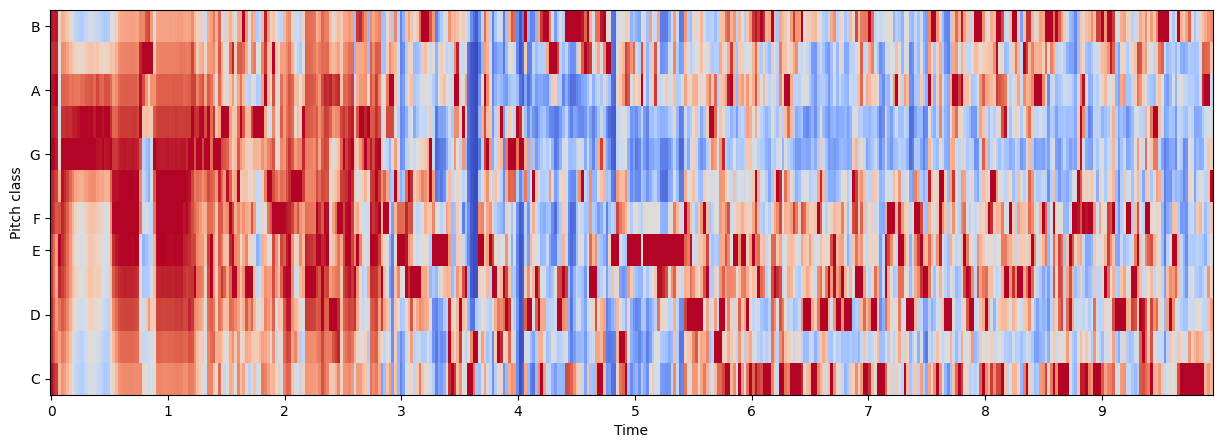

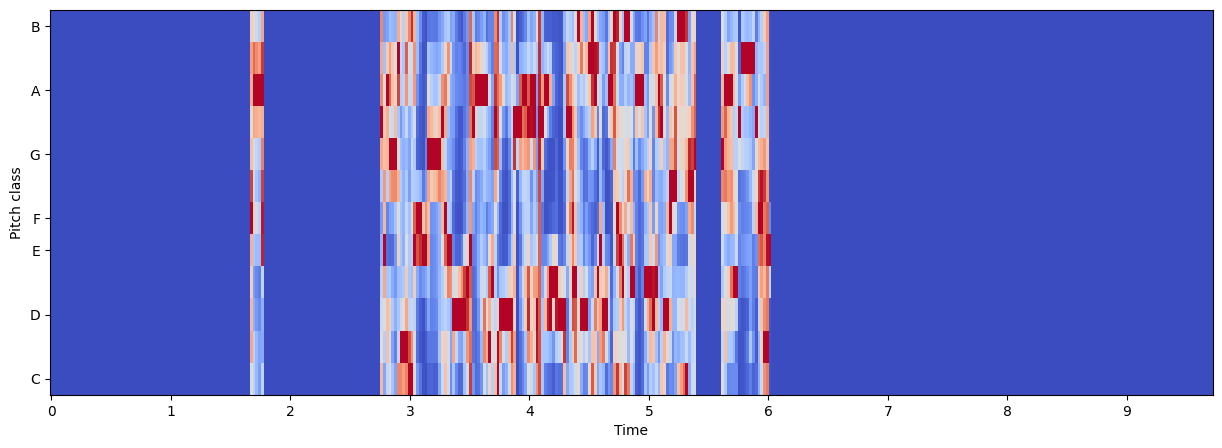

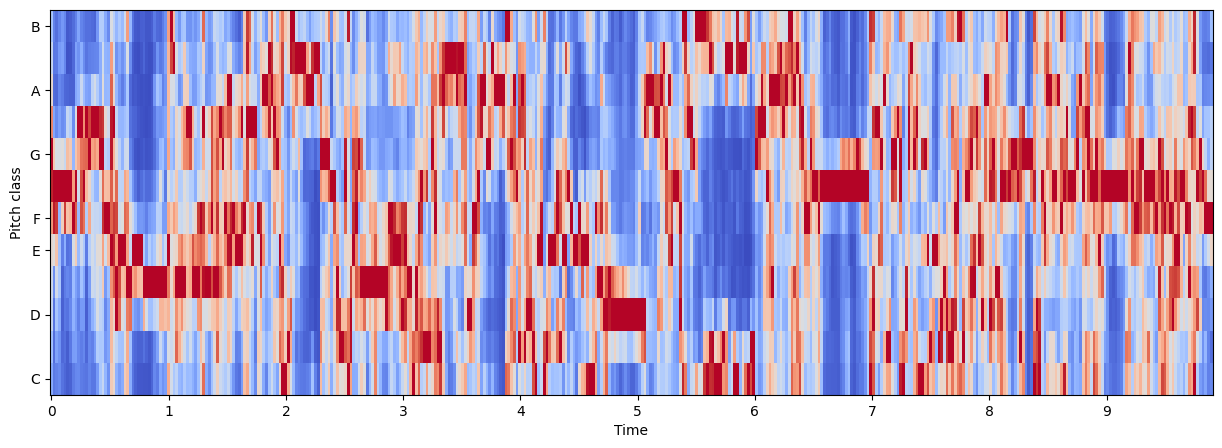

In [ ]:
for i in range(5):
  chromagram = librosa.feature.chroma_stft(y=data_vec[i], sr=Sampling_rate_vec[i], hop_length=512)
  plt.figure(figsize=(15, 5))
  librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=512, cmap='coolwarm')